In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tushare as ts


In [42]:
df = pd.read_csv('maotai_600519.csv', index_col='date', parse_dates=['date'])
df = df[['open', 'close', 'low', 'high']]
df

,open,close,low,high
date,,,,
2015-01-05,161.056,172.013,160.266,173.474
2015-01-06,169.872,168.029,166.492,172.047
2015-01-07,166.509,163.876,161.370,169.448
2015-01-08,164.776,162.874,161.498,165.218
2015-01-09,161.719,161.642,161.472,166.280
...,...,...,...,...
2020-12-28,1826.600,1873.000,1826.050,1888.800
2020-12-29,1873.000,1867.000,1855.000,1886.800
2020-12-30,1870.000,1933.000,1869.990,1933.000


In [43]:
#2、使用pandas包计算出该股票历史数据的5日均线和30日均线

# df['ma5'] = np.nan
# df['ma30'] = np.nan

# #5日平均线: 第五日下标为4，从4开始
# for i in range(4, len(df)): 
#     #给第i行的标签为ma5的值赋值: 切片切出前五天的收盘价，求平均值
#     df.loc[df.index[i], 'ma5'] = df['close'][i-4:i+1].mean()
# #30日平均线
# for i in range(29, len(df)):
#     df.loc[df.index[i], 'ma30'] = df['close'][i-29:i+1].mean()
    
df['ma5'] = df['close'].rolling(5).mean()
df['ma30'] = df['close'].rolling(30).mean()
df

,open,close,low,high,ma5,ma30
date,,,,,,
2015-01-05,161.056,172.013,160.266,173.474,NaN,NaN
2015-01-06,169.872,168.029,166.492,172.047,NaN,NaN
2015-01-07,166.509,163.876,161.370,169.448,NaN,NaN
2015-01-08,164.776,162.874,161.498,165.218,NaN,NaN
2015-01-09,161.719,161.642,161.472,166.280,165.6868,NaN
...,...,...,...,...,...,...
2020-12-28,1826.600,1873.000,1826.050,1888.800,1851.1980,1792.760667
2020-12-29,1873.000,1867.000,1855.000,1886.800,1848.3980,1797.800667
2020-12-30,1870.000,1933.000,1869.990,1933.000,1866.6680,1805.779000


<function matplotlib.pyplot.show(close=None, block=None)>

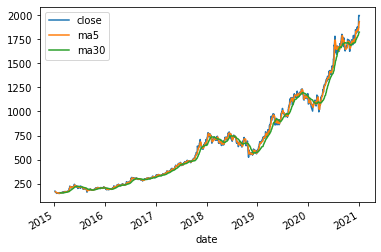

In [44]:
#3、使用matplotlib包可视化历史数据的收盘价和两条均线
df[['close', 'ma5', 'ma30']].plot()
plt.show

In [59]:
#4、分析输出所有金叉日期和死叉日期

df = df.dropna()
df = df['2015-01-01':]

# golden_cross = []
# death_cross = []
# for i in range(1, len(df)):
#     if df['ma5'][i] > df['ma30'][i] and df['ma5'][i-1] < df['ma30'][i-1]:
#         golden_cross.append(df.index[i])
        
#     if df['ma5'][i] < df['ma30'][i] and df['ma5'][i-1] > df['ma30'][i-1]:
#         death_cross.append(df.index[i])


#df['ma5'] < df['ma30'] 死叉
#df['ma5'] >= df['ma30'] 金叉
#TTTFFFTTT
# FFFTTTFFF
sr1 = df['ma5'] < df['ma30']
sr2 = df['ma5'] >= df['ma30']
death_cross = df[sr1 & sr2.shift(1)].index
golden_cross = df[~(sr1 | sr2.shift(1))].index
golden_cross

DatetimeIndex(['2015-02-13', '2015-07-15', '2015-09-16', '2015-10-09',
               '2015-12-03', '2015-12-21', '2016-02-22', '2016-08-11',
               '2016-10-13', '2016-11-25', '2017-07-24', '2017-09-18',
               '2017-12-15', '2018-03-16', '2018-05-09', '2018-07-18',
               '2018-07-25', '2018-09-20', '2018-12-04', '2019-01-03',
               '2019-06-14', '2019-08-13', '2020-01-02', '2020-02-19',
               '2020-03-03', '2020-04-02', '2020-08-19', '2020-10-14',
               '2020-11-05'],
              dtype='datetime64[ns]', name='date', freq=None)

In [64]:
#5、假如我从2015年1月1日开始，初始资金为100000元，金叉尽量买入，死叉全部卖出，则到今天为止，我的炒股收益如何?

first_money = 100000
money = 100000 #流动资金
hold = 0 #持有多少股

sr1 = pd.Series(1, index=golden_cross)
sr2 = pd.Series(0, index=death_cross)
sr = sr1.append(sr2).sort_index()
sr.index[0]

for i in range(0, len(sr)):
    price = df['open'][sr.index[i]]
    if sr.iloc[i] == 1:
        #金叉
        buy_hand = money // (price*100) #买多少手
        hold += buy_hand*100
        money -= price*buy_hand*100
    else:
        #死叉
        money += price*hold
        hold = 0
        
#当前股价
p = df['open'][-1]
new_money = hold*p + money
print('赚了', new_money)

赚了 931444.2
